---

## [미니프로젝트] 서울시 공유자전거 '따릉이'의 수요 예측

### 여러분은 서울시 정책 연구원으로서 서울시 공유자전거인 '따릉이'의 수요와 날씨간 연관성을 분석하라는 미션을 부여받았습니다.

#### <font color="blue"> 데이터 분석의 주 목적은 가치있는 정보를 찾아내는것!! </font>

### ▣ 우리가 풀어야 하는 문제는 무엇인가요?

 - 어떠한 날씨요소가 따릉이 수요와 관련 있는지 분석하여 인사이트를 도출해봅시다

---

## ▣ 데이터 소개
[기본 데이터]
* 데이터 : sbikedata.csv

## ▣ 데이터셋의 변수 소개
* date : 날짜
* hour : 시간
* temperature : 온도
* precipitation : 강우 여부, 비가 오지 않았으면 0, 비가 오면 1
* windspeed : 풍속(평균)
* humidity : 습도
* visibility : 시정(視程), 시계(視界)(특정 기상 상태에 따른 가시성을 의미)
* ozone : 오존 수치
* PM10 : 미세먼지 수치(머리카락 굵기의 1/5에서 1/7 크기의 미세먼지)
* PM2.5 : 초미세먼지 수치(머리카락 굵기의 1/20에서 1/30 크기의 미세먼지)
* count : 시간에 따른 따릉이 대여 수

---

### [Step1] 환경 설정
#### <span style="color: green"> 1) 라이브러리 불러오기 </span>

In [101]:
#EDA에 사용할 라이브러리를 import 하세요

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


#### <span style="color: green"> 2) 활용할 데이터 불러오기 </span>

In [102]:
#이번 프로젝트에서 분석할 데이터를 불러오세요

bicycle = pd.read_csv('C:/Users/User/iCloudDrive/AIVLE/3주차/미니프로젝트 3일차\sbikedata.csv')

In [103]:
bicycle

,date,hour,PM10,PM2.5,ozone,temperature,precipitation,windspeed,humidity,visibility,count
0,2021-04-01,1,42.0,21.0,0.002,13.1,0,1.4,49,2000,46
1,2021-04-01,2,41.0,21.0,0.003,12.4,0,2.1,53,2000,40
2,2021-04-01,3,30.0,13.0,0.023,13.1,0,3.4,43,2000,31
3,2021-04-01,4,27.0,12.0,0.028,13.0,0,3.1,44,2000,12
4,2021-04-01,5,29.0,14.0,0.008,13.0,0,2.9,44,2000,30
...,...,...,...,...,...,...,...,...,...,...,...
5822,2021-11-29,20,74.0,58.0,0.002,9.3,0,0.3,66,1193,273
5823,2021-11-29,21,65.0,56.0,0.002,8.4,0,2.0,70,1233,228
5824,2021-11-29,22,51.0,41.0,0.002,8.6,0,1.9,70,1250,215
5825,2021-11-29,23,43.0,35.0,0.001,8.2,0,2.1,71,1262,125


### [Step2] 가설설정
#### '가설' 이란 단어를 생각해보면, 우리가 직접 가설을 만들어야 할것 같지만 통계에서 분석기법별 귀무가설/대립가설은 정해져있습니다.
- 귀무가설은 차이가 없다, 연관성이 없다, 효과가 없다.
- 대립가설은 차이가 있다, 연관성이 있다, 효과가 있다. 라고 간단하게 이해하시면 좋습니다.

#### 간단한 예로, 온도와 따릉이 대여량간 가설을 수립 해본다면

    - 귀무가설 : 온도와 따릉이 간에는 연관성이 없다.
    - 대립가설 : 온도와 따릉이 간에는 연관성이 있다.

로 가설이 자연스레 수립 됩니다.



---


#### <span style="color: green"> 'precipitation' 등의 변수를 포함하여, 5개 이상의 Feature와 따릉이 대여량 간 가설을 수립해주세요. </span>

##### Guide : Target은 따릉이 대여량 입니다.

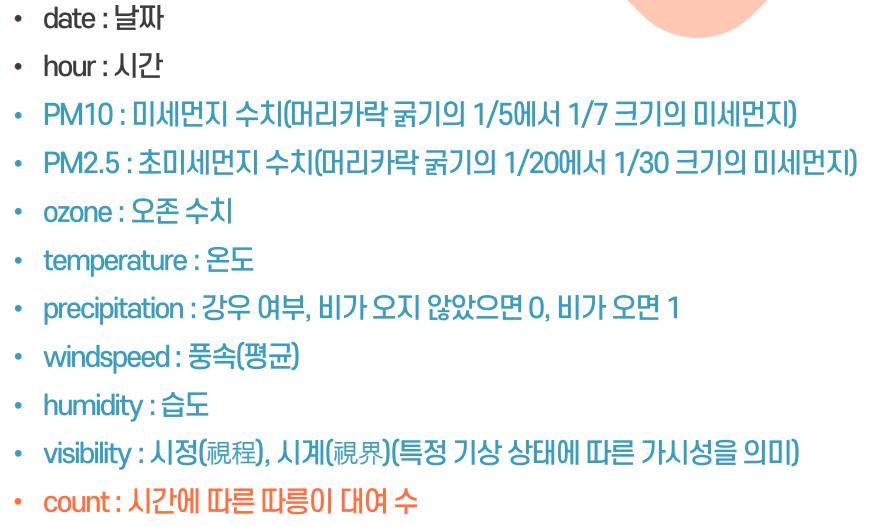

- 가설 1(예시) : ㅇ 귀무가설: 강우 여부와 따릉이간에는 연관성이 없다.
    
    ㅇ 대립가설 : 강우 여부와 따릉이 대여량 간에는 연관성이 있다.


- 가설 2 : 온도의 높낮이와 따릉이 대여량 간에는 연관성이 있다. (습도와 함께 파악하면 좋을듯함)

- 가설 3 : 풍속과 따릉이 대여 여부는 연관성이 있다. (풍속이 높을 수록 따릉이 대여량이 감소)

- 가설 4 : 출퇴근시간대와 평균적인 귀가시간대에 따릉이 대여율이 높을 것이다.

- 가설 5 : 미세먼지 및 초미세먼지 수치가 높을 때 따릉이 대여율이 감소할 것이다.

- 가설 6 : 평일과 주말 간 따릉이 대여율이 높은 시간에 차이가 있을 것이다.

### [Step3] 단변량 분석

단변량 분석은 데이터분석의 매우 기초적인 분석기법으로, 독립적인 개별 변수가 가지고있는 특성들을 이해하는 과정입니다.

<span style="color: green"> 개별 변수에 대해 아래 사항들을 분석해보세요. </span>

1. 변수가 내포하고 있는 의미
2. 변수가 수치형인지, 범주형인지
3. 결측치 존재 여부 및 조치 방안
4. 기초 통계량 확인
5. 데이터 분포 확인
6. 위 정보로부터 파악한 내용 정리
7. 추가 분석사항 도출

### Feature1 : hour

1. 변수가 내포하고 있는 의미

- 변수의 의미를 한번 짚고 넘어갑시다.
hour 변수는 어떤 의미를 가지고 있나요?

2. 변수가 수치형인지 범주형인지


In [104]:
#변수의 자료형을 확인해보세요.

bicycle.describe()

,hour,PM10,PM2.5,ozone,temperature,precipitation,windspeed,humidity,visibility,count
count,5827.000000,5725.000000,5732.000000,5699.000000,5827.000000,5827.000000,5827.000000,5827.000000,5827.000000,5827.000000
mean,11.506607,31.970655,15.666609,0.031811,19.376798,0.075511,2.237601,68.608718,1758.438648,215.117899
std,6.921963,42.987292,13.850990,0.018277,7.501572,0.264236,1.054516,17.277266,490.969394,185.972900
min,0.000000,3.000000,1.000000,0.001000,-3.500000,0.000000,0.000000,19.000000,60.000000,1.000000
25%,6.000000,16.000000,7.000000,0.019000,14.100000,0.000000,1.500000,56.000000,1935.500000,53.000000
50%,12.000000,25.000000,13.000000,0.031000,20.400000,0.000000,2.200000,70.000000,2000.000000,186.000000
75%,18.000000,37.000000,20.000000,0.041000,24.900000,0.000000,2.800000,82.000000,2000.000000,315.000000
max,23.000000,827.000000,125.000000,0.137000,36.300000,1.000000,8.300000,100.000000,2000.000000,1746.000000


In [105]:
bicycle.isnull().sum()

date               0
hour               0
PM10             102
PM2.5             95
ozone            128
temperature        0
precipitation      0
windspeed          0
humidity           0
visibility         0
count              0
dtype: int64

미세먼지 및 오존에서 결측치가 발생, 5827개 데이터 중 약 300개는 큰 수치가 아니긴 하나 살릴 방법이 있을까?

3. 변수의 결측치 존재 여부 및 조치방안

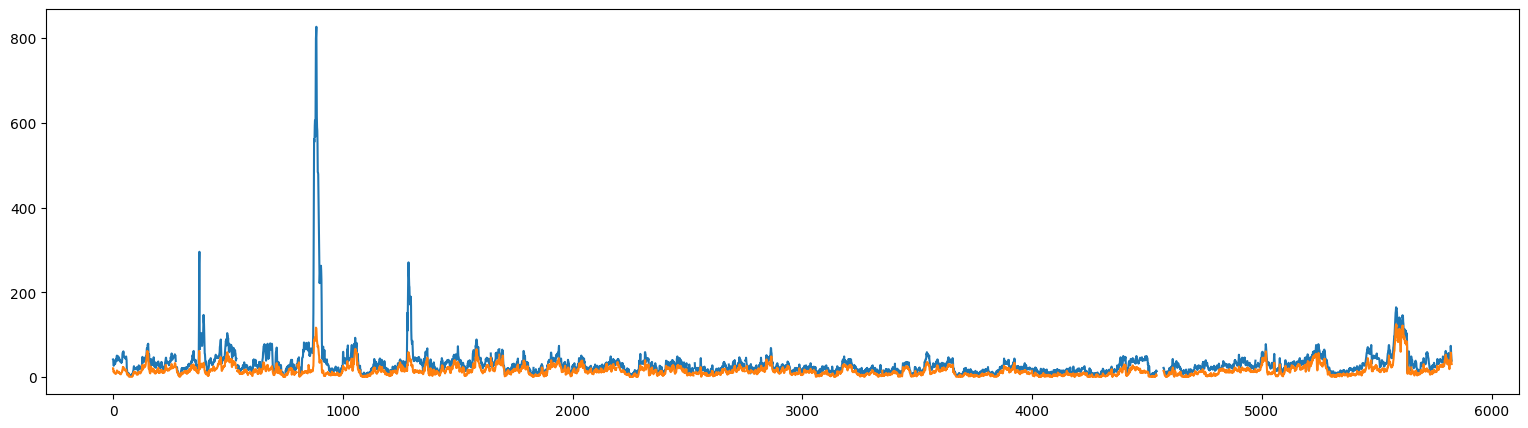

In [106]:
#변수의 결측치 존재 여부를 확인하고, 만약 결측치가 존재하면 어떻게 처리할지 고민해보세요. 
plt.figure(figsize = (19, 5))
plt.plot('PM10', data = bicycle)
plt.plot('PM2.5', data = bicycle)

4. 변수의 기초 통계량 확인

In [107]:
#변수의 기초 통계량을 확인해보세요.
bicycle['PM10'].describe()

count    5725.000000
mean       31.970655
std        42.987292
min         3.000000
25%        16.000000
50%        25.000000
75%        37.000000
max       827.000000
Name: PM10, dtype: float64

In [108]:
cycle = bicycle.interpolate() # 결측치 보간
cycle.isnull().sum()

date             0
hour             0
PM10             0
PM2.5            0
ozone            0
temperature      0
precipitation    0
windspeed        0
humidity         0
visibility       0
count            0
dtype: int64

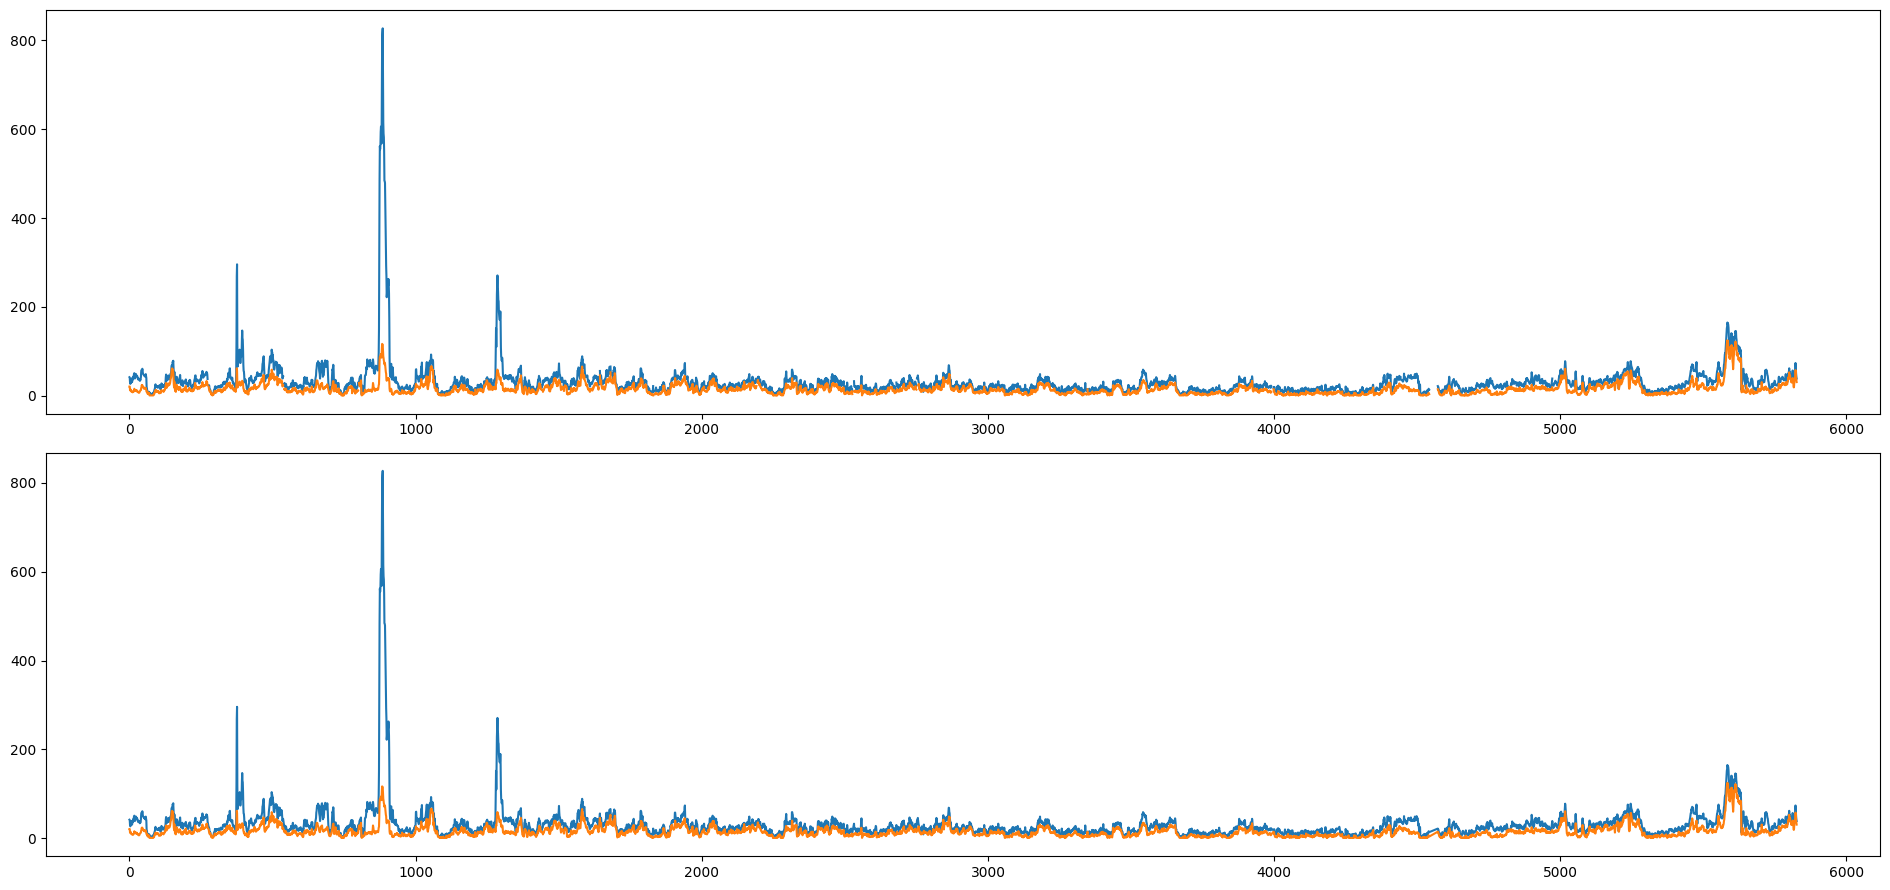

In [109]:
plt.figure(figsize = (19, 9))
plt.subplot(2, 1, 1)
plt.plot('PM10', data = bicycle)
plt.plot('PM2.5', data = bicycle)

plt.subplot(2, 1, 2)
plt.plot('PM10', data = cycle)
plt.plot('PM2.5', data = cycle)

plt.tight_layout()
plt.show()

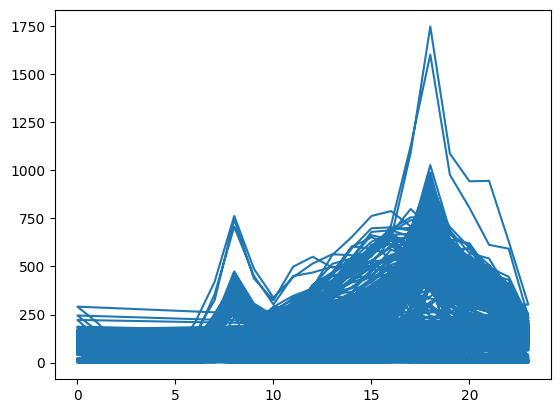

In [182]:
plt.plot(cycle['hour'], cycle['count'])


5. 변수의 분포 확인

In [179]:
# #변수의 분포를 확인해보세요.
# df.groupby('gender')['height'].agg(**{'mean_height':'mean'}).reset_index()
hcheck = cycle.groupby('hour')['count'].agg(**{'count_mean':'mean'}).reset_index()
hcheck

,hour,count_mean
0,0,92.074074
1,1,56.864198
2,2,35.380165
3,3,23.661157
4,4,17.448133
5,5,28.226337
6,6,67.425620
7,7,137.703704
8,8,253.222222
9,9,186.242798


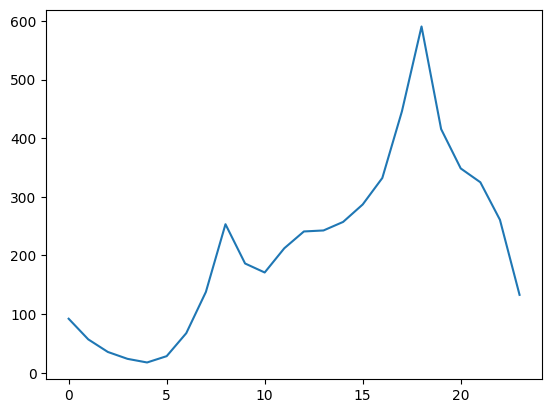

In [181]:
plt.plot(hcheck['hour'], hcheck['count_mean'])


07시 및 18시 부근에 대여량이 유의미하게 많아짐, 12시부터 증가하다가 18시 기점으로 감소하는 모습

6. 위 정보로 부터 파악한 내용 정리

In [112]:
#위 정보로부터 파악하신 내용을 정리해보세요.

7. 추가 분석사항 도출

In [113]:
#추가로 분석을 원하는 부분이 있다면 분석후 정리해보세요.

### Feature2 : temperature

1. 변수가 내포하고 있는 의미
- 변수의 의미를 한번 짚고 넘어갑시다. 여러분이 생각하는 이 변수의 의미를 작성해보세요.

2. 변수가 수치형인지 범주형인지
3. 변수의 결측치 존재 여부 및 조치방안
4. 변수의 기초 통계량 확인
5. 변수의 분포 확인
6. 위 정보로 부터 파악한 내용 정리
7. 추가 분석사항 도출

In [114]:
#변수의 자료형을 확인해보세요.
cycle['temperature'].describe()

count    5827.000000
mean       19.376798
std         7.501572
min        -3.500000
25%        14.100000
50%        20.400000
75%        24.900000
max        36.300000
Name: temperature, dtype: float64

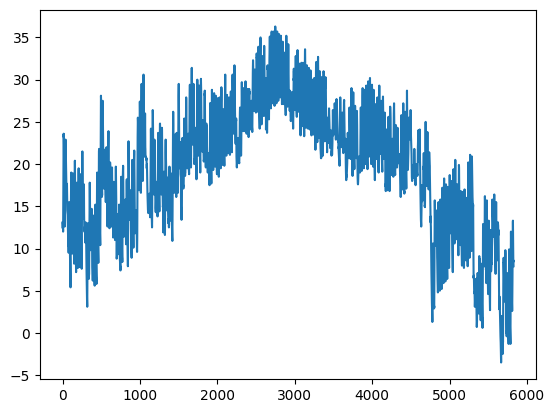

In [115]:
plt.plot('temperature', data=cycle)

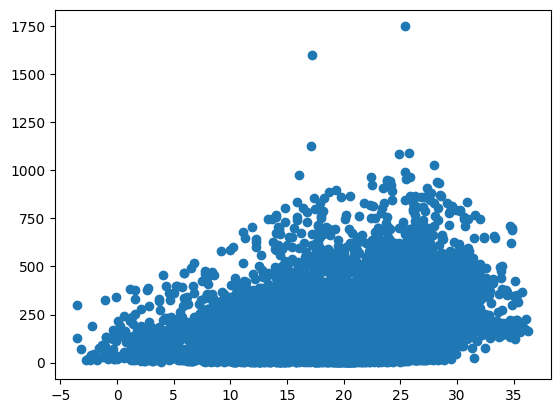

In [116]:
plt.scatter(cycle['temperature'], cycle['count'])


약 25~28도 부근까지는 대여량이 증가하다가 그 이후부터 다시 감소하고 있음

In [183]:
#변수의 기초 통계량을 확인해보세요
cycle['temperature'].describe()

count    5827.000000
mean       19.376798
std         7.501572
min        -3.500000
25%        14.100000
50%        20.400000
75%        24.900000
max        36.300000
Name: temperature, dtype: float64

In [121]:
#추가로 분석을 원하는 부분이 있다면 분석후 정리해보세요.

### Feature3 : precipitation (강수여부)

1. 변수가 내포하고 있는 의미
- 변수의 의미를 한번 짚고 넘어갑시다. 여러분이 생각하는 이 변수의 의미를 작성해보세요.

2. 변수가 수치형인지 범주형인지


In [122]:
#변수의 자료형을 확인해보세요.
cycle['precipitation'].value_counts()

0    5387
1     440
Name: precipitation, dtype: int64

3. 변수의 결측치 존재 여부 및 조치방안

In [123]:
#변수의 결측치 존재 여부를 확인하고, 만약 결측치가 존재하면 어떻게 처리할지 고민해보세요. 

4. 변수의 기초 통계량 확인

In [124]:
#변수의 기초 통계량을 확인해보세요
cycle['precipitation'].describe()

count    5827.000000
mean        0.075511
std         0.264236
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: precipitation, dtype: float64

5. 변수의 분포 확인

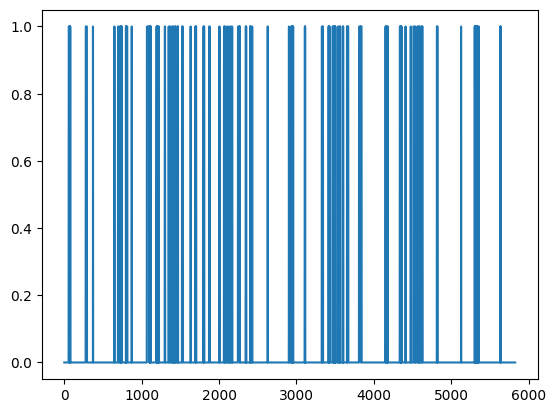

In [184]:
#변수의 분포를 확인해보세요.
plt.plot(cycle['precipitation'])

* date : 날짜
* hour : 시간
* temperature : 온도
* precipitation : 강우 여부, 비가 오지 않았으면 0, 비가 오면 1
* windspeed : 풍속(평균)
* humidity : 습도
* visibility : 시정(視程), 시계(視界)(특정 기상 상태에 따른 가시성을 의미)
* ozone : 오존 수치
* PM10 : 미세먼지 수치(머리카락 굵기의 1/5에서 1/7 크기의 미세먼지)
* PM2.5 : 초미세먼지 수치(머리카락 굵기의 1/20에서 1/30 크기의 미세먼지)
* count : 시간에 따른 따릉이 대여 수

6. 위 정보로 부터 파악한 내용 정리

#위 정보로부터 파악하신 내용을 정리해보세요.


비가 오지 않은 날의 데이터가 더 많았음

7. 추가 분석사항 도출

In [127]:
#추가로 분석을 원하는 부분이 있다면 분석후 정리해보세요.
# sns.kdeplot(x= feature, data = data, hue = target, common_norm = False)

sns.kdeplot(x='')
plt.show()

### Feature4 : windspeed

1. 변수가 내포하고 있는 의미
- 변수의 의미를 한번 짚고 넘어갑시다. 여러분이 생각하는 이 변수의 의미를 작성해보세요.

2. 변수가 수치형인지 범주형인지


In [128]:
#변수의 자료형을 확인해보세요.
cycle['windspeed'].value_counts()

2.3    255
2.2    246
2.1    242
1.9    239
1.7    235
      ... 
6.9      1
5.8      1
6.8      1
6.4      1
6.2      1
Name: windspeed, Length: 72, dtype: int64

3. 변수의 결측치 존재 여부 및 조치방안

In [129]:
#변수의 결측치 존재 여부를 확인하고, 만약 결측치가 존재하면 어떻게 처리할지 고민해보세요. 

4. 변수의 기초 통계량 확인

In [130]:
#변수의 기초 통계량을 확인해보세요
cycle['windspeed'].describe()

count    5827.000000
mean        2.237601
std         1.054516
min         0.000000
25%         1.500000
50%         2.200000
75%         2.800000
max         8.300000
Name: windspeed, dtype: float64

5. 변수의 분포 확인

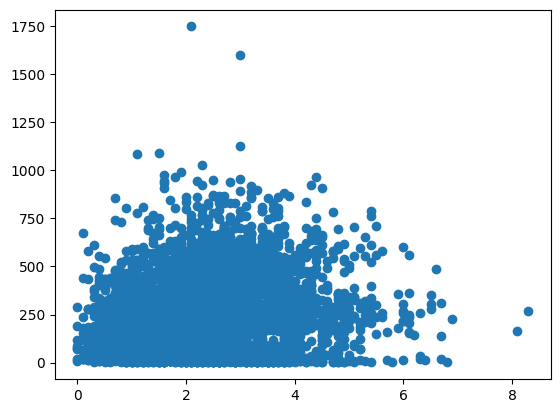

In [131]:
#변수의 분포를 확인해보세요.
plt.scatter(cycle['windspeed'], cycle['count'])



6. 위 정보로 부터 파악한 내용 정리

#위 정보로부터 파악하신 내용을 정리해보세요.
- 풍속이 5를 넘어서는 시점부터 대여량이 줄어드는 모습을 보이고 있다.

7. 추가 분석사항 도출

In [133]:
#추가로 분석을 원하는 부분이 있다면 분석후 정리해보세요.

### Feature5 : humidity

1. 변수가 내포하고 있는 의미
- 변수의 의미를 한번 짚고 넘어갑시다. 여러분이 생각하는 이 변수의 의미를 작성해보세요.

2. 변수가 수치형인지 범주형인지


In [186]:
#변수의 자료형을 확인해보세요.
cycle['humidity']

0       49
1       53
2       43
3       44
4       44
        ..
5822    66
5823    70
5824    70
5825    71
5826    71
Name: humidity, Length: 5827, dtype: int64

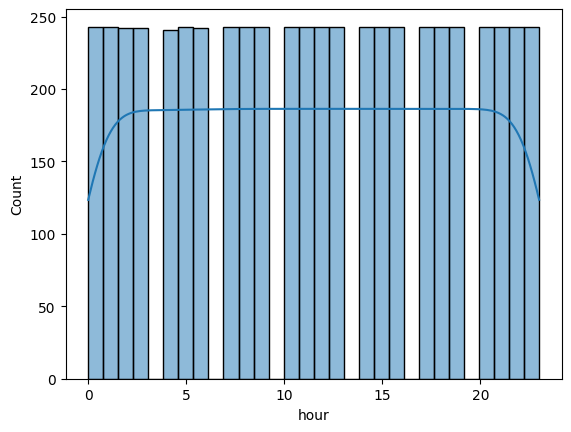

In [324]:
sns.histplot(x='hour', data=cycle, kde=True, bins=30)
plt.show()

<AxesSubplot: xlabel='hour'>

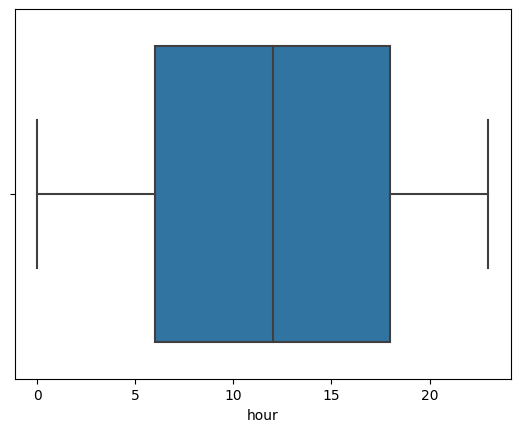

In [325]:
sns.boxplot(x='hour', data=cycle)

3. 변수의 결측치 존재 여부 및 조치방안

In [188]:
#변수의 결측치 존재 여부를 확인하고, 만약 결측치가 존재하면 어떻게 처리할지 고민해보세요. 
cycle['humidity'].isnull().value_counts()

False    5827
Name: humidity, dtype: int64

4. 변수의 기초 통계량 확인

In [189]:
#변수의 기초 통계량을 확인해보세요
cycle['humidity'].value_counts()

70    142
76    138
75    128
63    127
77    127
     ... 
24      4
20      3
21      2
22      2
19      1
Name: humidity, Length: 82, dtype: int64

5. 변수의 분포 확인

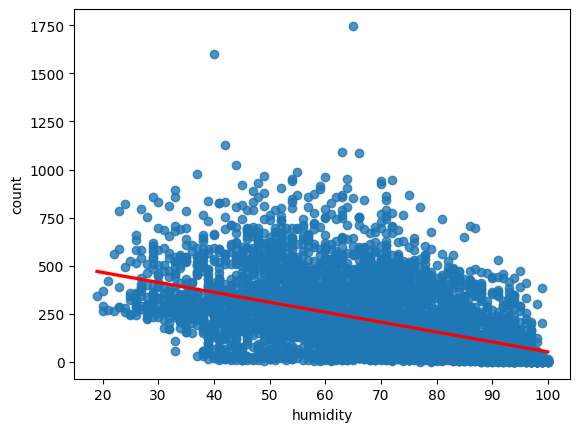

In [205]:
#변수의 분포를 확인해보세요.
# ax3 = sns.regplot(x='MntMeatProducts',y='MntWines',data=df, fit_reg=True)
# plt.scatter(cycle['humidity'], cycle['count'])
sns.regplot(x='humidity', y='count', data=cycle, fit_reg=True, line_kws={'color': 'red'})
plt.show()

6. 위 정보로 부터 파악한 내용 정리

In [138]:
#위 정보로부터 파악하신 내용을 정리해보세요.

습도가 올라갈수록 탑승횟수가 적어진다.

7. 추가 분석사항 도출

In [139]:
#추가로 분석을 원하는 부분이 있다면 분석후 정리해보세요.

### Feature6 : visibility

1. 변수가 내포하고 있는 의미
- 변수의 의미를 한번 짚고 넘어갑시다. 여러분이 생각하는 이 변수의 의미를 작성해보세요.

2. 변수가 수치형인지 범주형인지


In [194]:
#변수의 자료형을 확인해보세요.
cycle['visibility']

0       2000
1       2000
2       2000
3       2000
4       2000
        ... 
5822    1193
5823    1233
5824    1250
5825    1262
5826    1483
Name: visibility, Length: 5827, dtype: int64

3. 변수의 결측치 존재 여부 및 조치방안

In [195]:
#변수의 결측치 존재 여부를 확인하고, 만약 결측치가 존재하면 어떻게 처리할지 고민해보세요. 
cycle['visibility'].isnull().value_counts()

False    5827
Name: visibility, dtype: int64

4. 변수의 기초 통계량 확인

In [196]:
#변수의 기초 통계량을 확인해보세요
cycle['visibility'].describe()

count    5827.000000
mean     1758.438648
std       490.969394
min        60.000000
25%      1935.500000
50%      2000.000000
75%      2000.000000
max      2000.000000
Name: visibility, dtype: float64

In [197]:
cycle['visibility'].value_counts()

2000    4218
1996       8
1984       7
1992       7
1997       6
        ... 
1756       1
313        1
848        1
1406       1
1250       1
Name: visibility, Length: 1032, dtype: int64

5. 변수의 분포 확인

<AxesSubplot: xlabel='visibility', ylabel='count'>

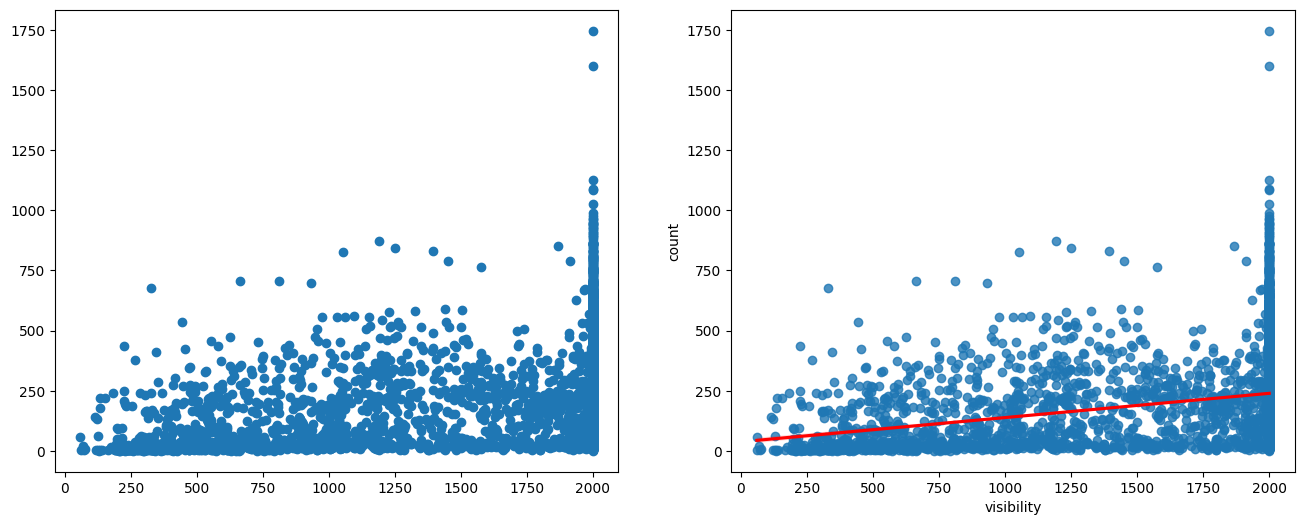

In [204]:
#변수의 분포를 확인해보세요.
plt.figure(figsize=(16, 6))
plt.subplot(1, 2, 1)
plt.scatter('visibility', 'count', data=cycle)

plt.subplot(1, 2, 2)
sns.regplot(x='visibility', y='count', data=cycle, fit_reg=True, line_kws={'color': 'red'})



가시거리가 길어질 수록 탑승량이 증가한다.

6. 위 정보로 부터 파악한 내용 정리

In [144]:
#위 정보로부터 파악하신 내용을 정리해보세요.

7. 추가 분석사항 도출

In [145]:
#추가로 분석을 원하는 부분이 있다면 분석후 정리해보세요.

### Feature7 : ozone

1. 변수가 내포하고 있는 의미
- 변수의 의미를 한번 짚고 넘어갑시다. 여러분이 생각하는 이 변수의 의미를 작성해보세요.

2. 변수가 수치형인지 범주형인지


In [206]:
#변수의 자료형을 확인해보세요.
cycle['ozone']

0       0.002
1       0.003
2       0.023
3       0.028
4       0.008
        ...  
5822    0.002
5823    0.002
5824    0.002
5825    0.001
5826    0.004
Name: ozone, Length: 5827, dtype: float64

3. 변수의 결측치 존재 여부 및 조치방안

In [207]:
#변수의 결측치 존재 여부를 확인하고, 만약 결측치가 존재하면 어떻게 처리할지 고민해보세요. 
cycle['ozone'].isnull().value_counts()

False    5827
Name: ozone, dtype: int64

4. 변수의 기초 통계량 확인

In [209]:
#변수의 기초 통계량을 확인해보세요
cycle['ozone'].describe()

count    5827.000000
mean        0.031634
std         0.018263
min         0.001000
25%         0.019000
50%         0.030000
75%         0.041000
max         0.137000
Name: ozone, dtype: float64

5. 변수의 분포 확인

<AxesSubplot: xlabel='ozone', ylabel='count'>

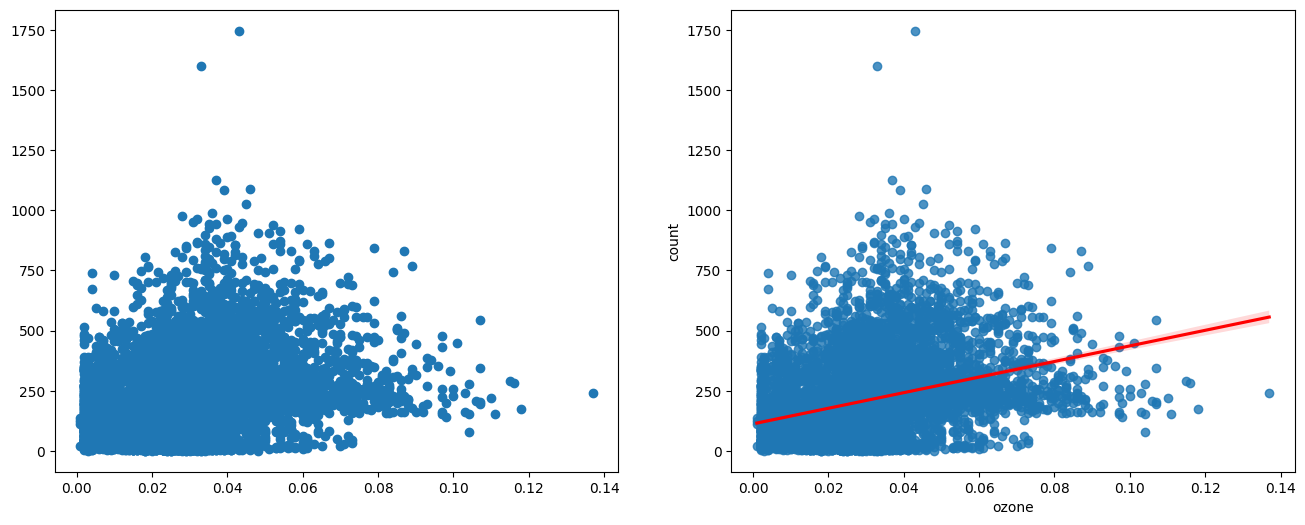

In [210]:
#변수의 분포를 확인해보세요.
plt.figure(figsize=(16, 6))
plt.subplot(1, 2, 1)
plt.scatter('ozone', 'count', data=cycle)

plt.subplot(1, 2, 2)
sns.regplot(x='ozone', y='count', data=cycle, fit_reg=True, line_kws={'color': 'red'})



0.04까지는 탑승량이 증가하는 것처럼 보이지만 데이터 자체가 유의미한 연관성을 지니고 있는 것처럼 보이지는 않는다.

6. 위 정보로 부터 파악한 내용 정리

In [150]:
#위 정보로부터 파악하신 내용을 정리해보세요.

7. 추가 분석사항 도출

In [151]:
#추가로 분석을 원하는 부분이 있다면 분석후 정리해보세요.

### Feature8 : PM10

1. 변수가 내포하고 있는 의미
- 변수의 의미를 한번 짚고 넘어갑시다. 여러분이 생각하는 이 변수의 의미를 작성해보세요.

2. 변수가 수치형인지 범주형인지


In [211]:
#변수의 자료형을 확인해보세요.
cycle['PM10']

0       42.0
1       41.0
2       30.0
3       27.0
4       29.0
        ... 
5822    74.0
5823    65.0
5824    51.0
5825    43.0
5826    39.0
Name: PM10, Length: 5827, dtype: float64

3. 변수의 결측치 존재 여부 및 조치방안

In [214]:
#변수의 결측치 존재 여부를 확인하고, 만약 결측치가 존재하면 어떻게 처리할지 고민해보세요. 
cycle['PM10'].isnull().value_counts()

False    5827
Name: PM10, dtype: int64

4. 변수의 기초 통계량 확인

In [215]:
#변수의 기초 통계량을 확인해보세요
cycle['PM10'].value_counts()

18.0     183
22.0     179
20.0     178
23.0     175
16.0     174
        ... 
216.0      1
213.0      1
189.0      1
182.0      1
332.0      1
Name: PM10, Length: 267, dtype: int64

5. 변수의 분포 확인

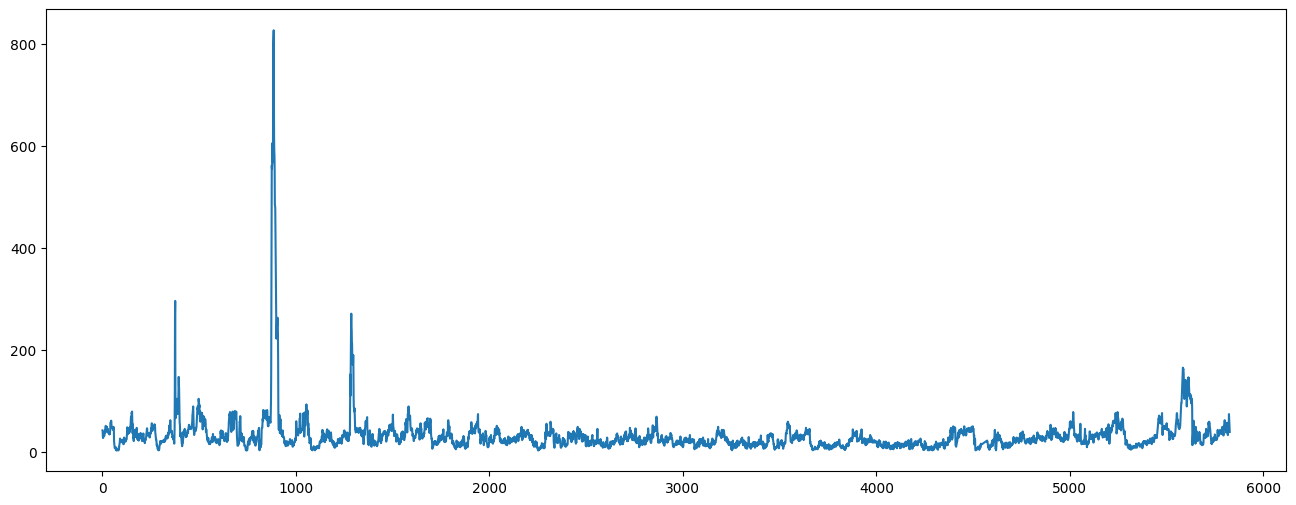

In [217]:
#변수의 분포를 확인해보세요.
plt.figure(figsize=(16, 6))
plt.plot(cycle['PM10'])

6. 위 정보로 부터 파악한 내용 정리

In [156]:
#위 정보로부터 파악하신 내용을 정리해보세요.

7. 추가 분석사항 도출

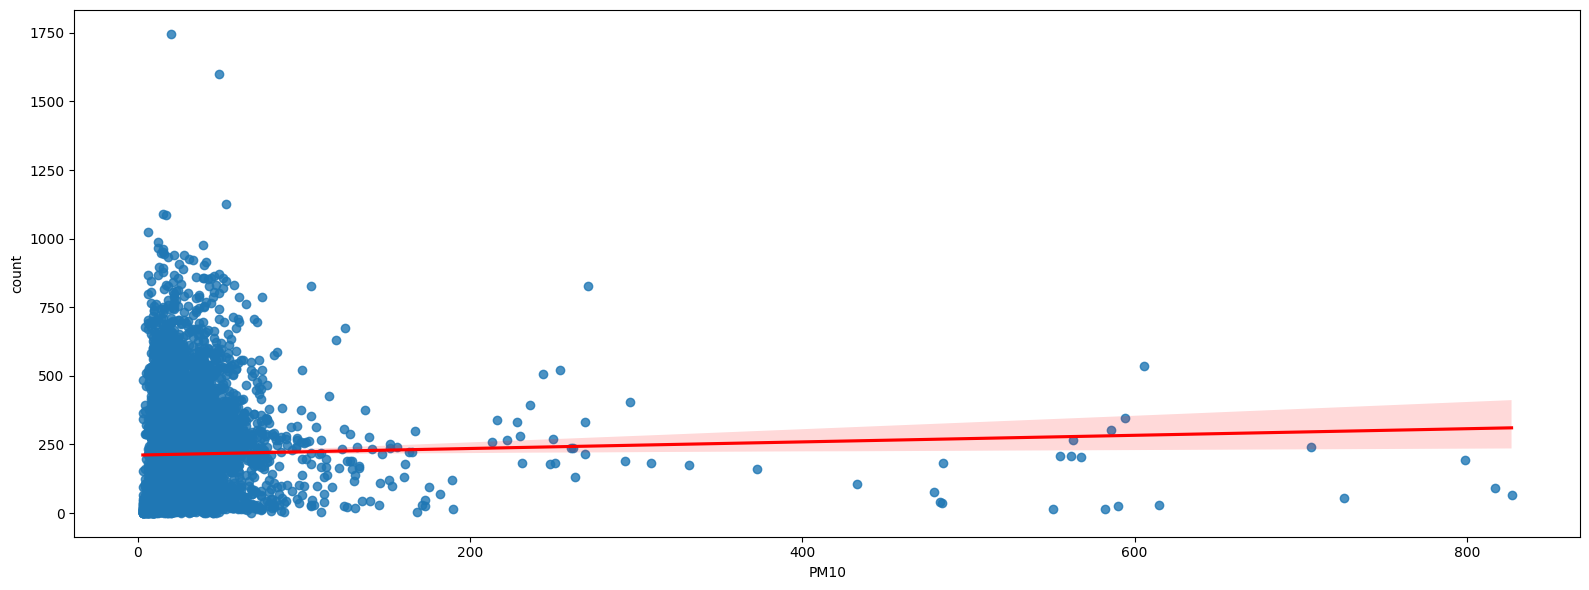

In [220]:
#추가로 분석을 원하는 부분이 있다면 분석후 정리해보세요.
plt.figure(figsize=(16, 6))
sns.regplot(x='PM10', y='count', data=cycle, fit_reg=True, line_kws={'color': 'red'})

plt.tight_layout()
plt.show()

미세먼지 수치가 높아짐에 따라서 이용률이 급격히 감소함

### Feature9 : PM2.5

1. 변수가 내포하고 있는 의미
- 변수의 의미를 한번 짚고 넘어갑시다. 여러분이 생각하는 이 변수의 의미를 작성해보세요.

2. 변수가 수치형인지 범주형인지


In [221]:
#변수의 자료형을 확인해보세요.
cycle['PM2.5']

0       21.0
1       21.0
2       13.0
3       12.0
4       14.0
        ... 
5822    58.0
5823    56.0
5824    41.0
5825    35.0
5826    31.0
Name: PM2.5, Length: 5827, dtype: float64

3. 변수의 결측치 존재 여부 및 조치방안

In [222]:
#변수의 결측치 존재 여부를 확인하고, 만약 결측치가 존재하면 어떻게 처리할지 고민해보세요. 
cycle['PM2.5'].isnull().value_counts()

False    5827
Name: PM2.5, dtype: int64

4. 변수의 기초 통계량 확인

In [223]:
#변수의 기초 통계량을 확인해보세요
cycle['PM2.5'].describe()

count    5827.000000
mean       15.633774
std        13.791083
min         1.000000
25%         7.000000
50%        13.000000
75%        20.000000
max       125.000000
Name: PM2.5, dtype: float64

5. 변수의 분포 확인

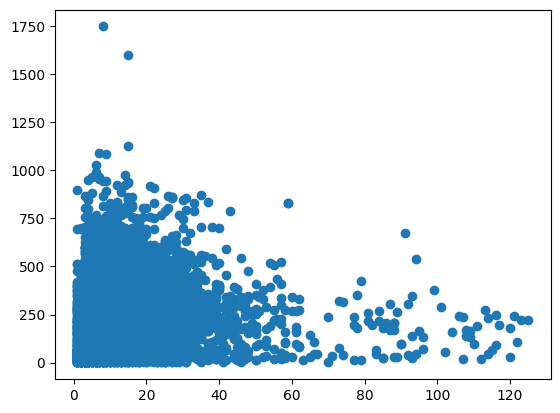

In [225]:
#변수의 분포를 확인해보세요.
plt.scatter(cycle['PM2.5'], cycle['count'])

6. 위 정보로 부터 파악한 내용 정리

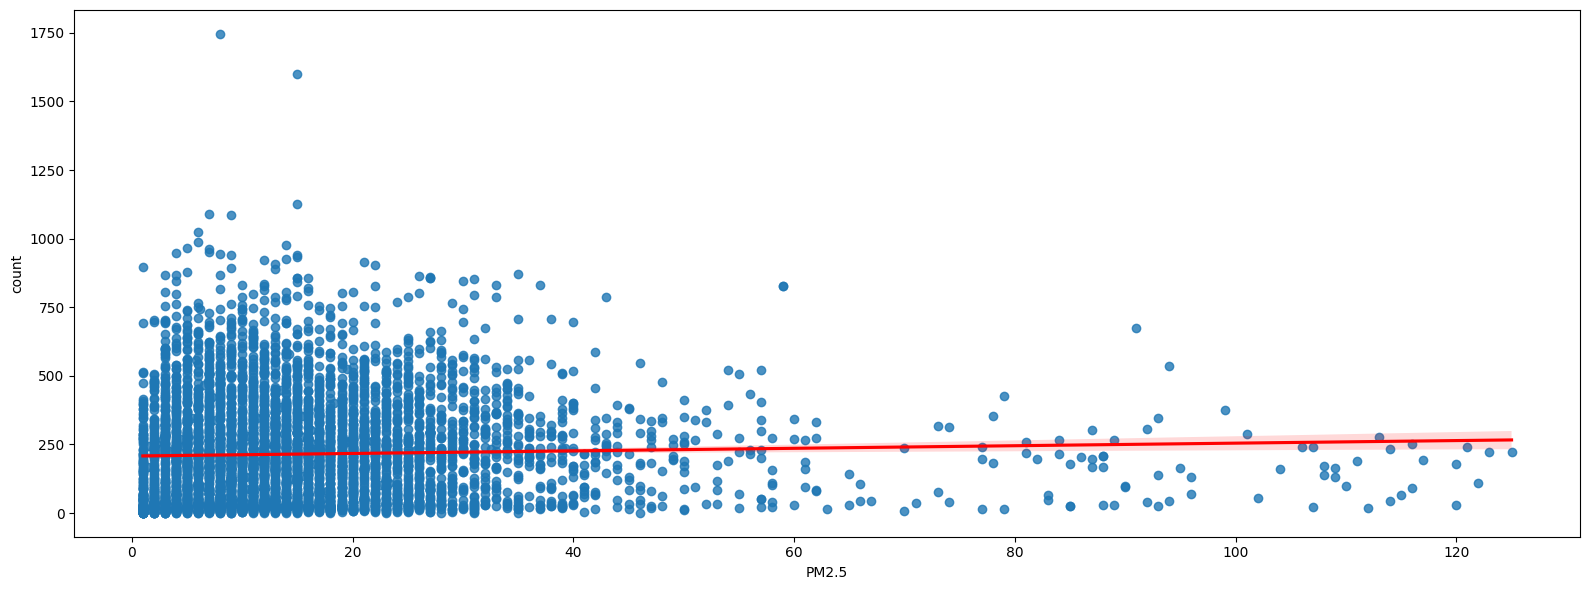

In [226]:
#위 정보로부터 파악하신 내용을 정리해보세요.
plt.figure(figsize=(16, 6))
sns.regplot(x='PM2.5', y='count', data=cycle, fit_reg=True, line_kws={'color': 'red'})

plt.tight_layout()
plt.show()

미세먼지 수치가 40을 넘어서는 순간부터 급격히 이용률이 줄어들기 시작함

7. 추가 분석사항 도출

In [163]:
#추가로 분석을 원하는 부분이 있다면 분석후 정리해보세요.

### Count (Target)

1. 변수가 내포하고 있는 의미
- 변수의 의미를 한번 짚고 넘어갑시다. 여러분이 생각하는 이 변수의 의미를 작성해보세요.

2. 변수가 수치형인지 범주형인지


In [227]:
#변수의 자료형을 확인해보세요.
cycle['count']

0        46
1        40
2        31
3        12
4        30
       ... 
5822    273
5823    228
5824    215
5825    125
5826     95
Name: count, Length: 5827, dtype: int64

3. 변수의 결측치 존재 여부 및 조치방안

In [228]:
#변수의 결측치 존재 여부를 확인하고, 만약 결측치가 존재하면 어떻게 처리할지 고민해보세요. 
cycle['count'].isnull().value_counts()

False    5827
Name: count, dtype: int64

4. 변수의 기초 통계량 확인

In [229]:
#변수의 기초 통계량을 확인해보세요
cycle['count'].describe()

count    5827.000000
mean      215.117899
std       185.972900
min         1.000000
25%        53.000000
50%       186.000000
75%       315.000000
max      1746.000000
Name: count, dtype: float64

5. 변수의 분포 확인

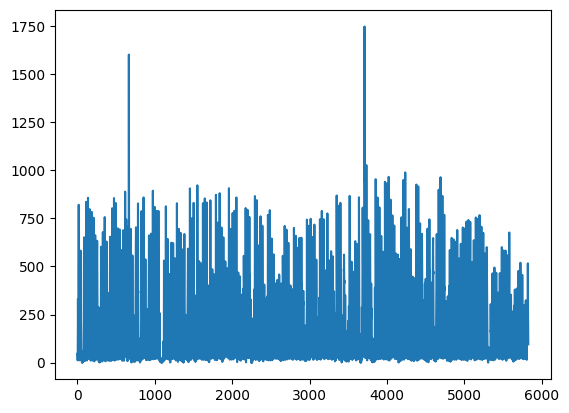

In [231]:
#변수의 분포를 확인해보세요.
plt.plot(cycle['count'])

6. 위 정보로 부터 파악한 내용 정리

In [168]:
#위 정보로부터 파악하신 내용을 정리해보세요.


7. 추가 분석사항 도출

In [169]:
#추가로 분석을 원하는 부분이 있다면 분석후 정리해보세요.

### [Step4] 이변량 분석 
* 자료의 종류에 맞게 X --> Y 에 대해서 그래프(시각화)와 가설검정(수치화)을 수행하고 결과를 평가합니다.
* 가설검정시 다음의 항목을 참조하여 수행합니다.
    * 적절한 유의수준
    * 숫자 --> 숫자 : 상관분석
    * 범주 --> 범주 : 카이제곱검정
    * 범주 --> 숫자 : t검정, 분산분석
    * 숫자 --> 범주 : 로지스틱 회귀모형을 통해, 회귀계수의 P.value로 검정을 수행합니다.

#### (1) 범주형 Feature --> 숫자형 Y (따릉이 대여 Count)

<font color="green">* 모든 범주형 Feature에 대해서 Y와 비교하여 차트를 그리고 수치화 하시오.</font>


        1. 시각화 : 그래프를 활용한 데이터 분석
        2. 수치화 : t-test, anova
        3. 관계 평가 (가설 검정)

1. 강수 여부와 따릉이 대여량간 이변량 분석

In [232]:
cycle

,date,hour,PM10,PM2.5,ozone,temperature,precipitation,windspeed,humidity,visibility,count
0,2021-04-01,1,42.0,21.0,0.002,13.1,0,1.4,49,2000,46
1,2021-04-01,2,41.0,21.0,0.003,12.4,0,2.1,53,2000,40
2,2021-04-01,3,30.0,13.0,0.023,13.1,0,3.4,43,2000,31
3,2021-04-01,4,27.0,12.0,0.028,13.0,0,3.1,44,2000,12
4,2021-04-01,5,29.0,14.0,0.008,13.0,0,2.9,44,2000,30
...,...,...,...,...,...,...,...,...,...,...,...
5822,2021-11-29,20,74.0,58.0,0.002,9.3,0,0.3,66,1193,273
5823,2021-11-29,21,65.0,56.0,0.002,8.4,0,2.0,70,1233,228
5824,2021-11-29,22,51.0,41.0,0.002,8.6,0,1.9,70,1250,215
5825,2021-11-29,23,43.0,35.0,0.001,8.2,0,2.1,71,1262,125


In [271]:
cycle['date'].value_counts()

2021-08-01    24
2021-09-12    24
2021-08-31    24
2021-09-01    24
2021-09-02    24
              ..
2021-04-01    23
2021-05-21    23
2021-09-21    22
2021-04-30    22
2021-11-30     1
Name: date, Length: 244, dtype: int64

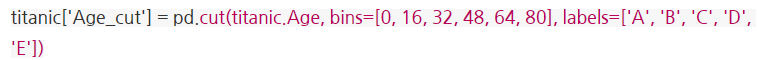

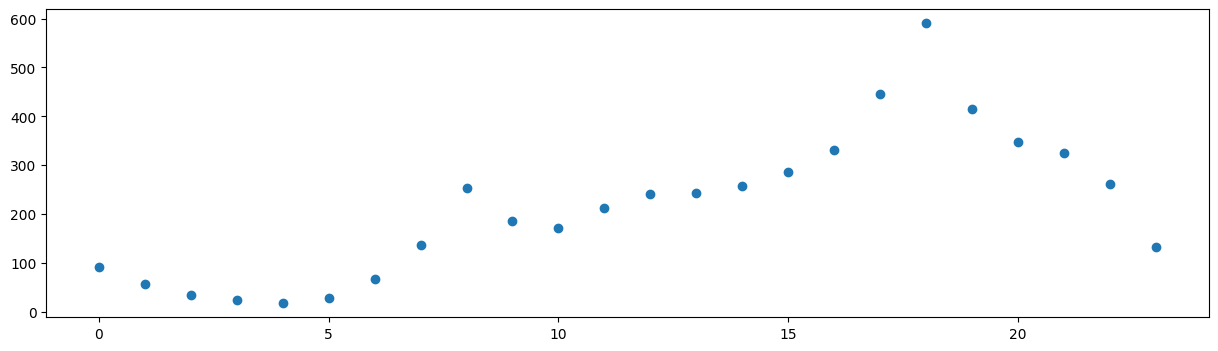

In [273]:
#데이터 타입에 주의하여 이변량 분석을 해보세요
# cycle.groupby('hour')[['count','temperature']].agg({'count':'mean','temperature':'mean'}).reset_index()
means = cycle.groupby('hour')['count'].agg(**{'count_mean':'mean'}).reset_index()
plt.figure(figsize=(15, 4))
plt.scatter(x = 'hour', y='count_mean', data=means)

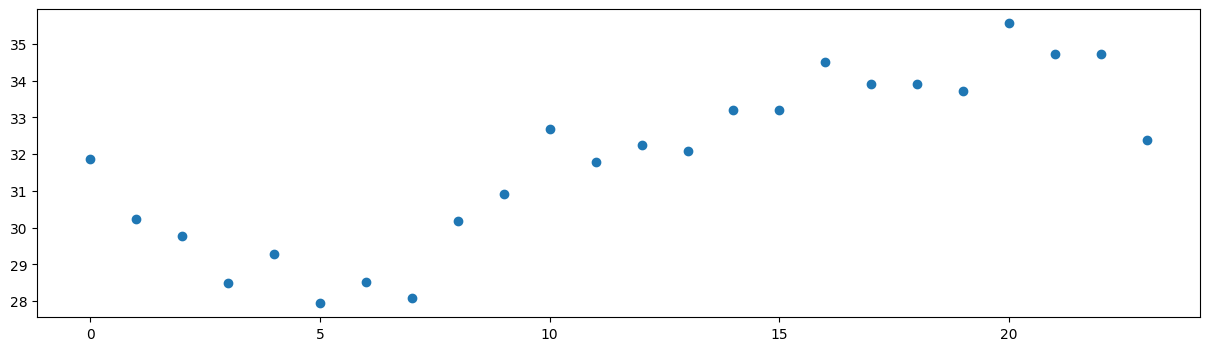

In [268]:
means = cycle.groupby('hour')['PM10'].agg(**{'PM10_mean':'mean'}).reset_index()
means
plt.figure(figsize=(15, 4))
plt.scatter(x = 'hour', y='PM10_mean', data=means)

# sns.kdeplot(x='PM10_mean', data = means, hue ='hour', common_norm = False)
plt.show()

평균적으로 20시까지 초미세먼지 수치가 치솟다가 약 7시까지 하락한다.

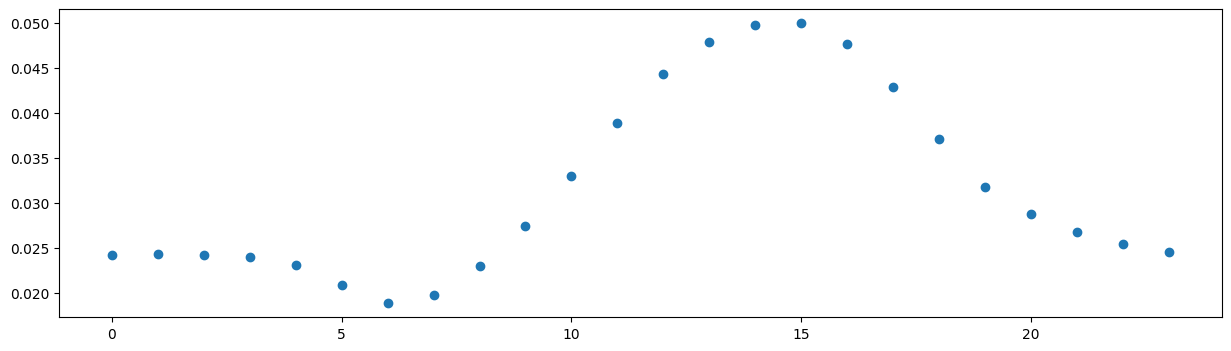

In [269]:
means = cycle.groupby('hour')['ozone'].agg(**{'temp':'mean'}).reset_index()
means

plt.figure(figsize=(15, 4))
plt.scatter(x = 'hour', y='temp', data=means)
plt.show()

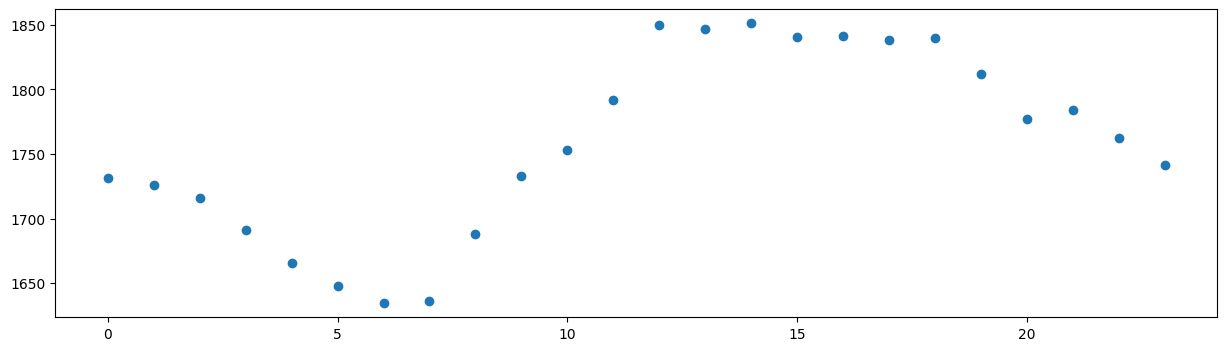

In [270]:
means = cycle.groupby('hour')['visibility'].agg(**{'temp':'mean'}).reset_index()
means

plt.figure(figsize=(15, 4))
plt.scatter(x = 'hour', y='temp', data=means)
plt.show()

In [291]:
#데이터 타입에 주의하여 이변량 분석을 해보세요
hourmean = cycle.groupby('hour')[['count','temperature', 'PM10', 'ozone', 'precipitation', 'windspeed', 'humidity', 'visibility']].agg({'count':'mean','temperature':'mean', 'PM10':'mean', 'ozone':'mean', 'precipitation':'mean', 'windspeed':'mean', 'humidity':'mean', 'visibility':'mean'}).reset_index()

hourmean

,hour,count,temperature,PM10,ozone,precipitation,windspeed,humidity,visibility
0,0,92.074074,17.782716,31.860905,0.024245,0.094650,1.776132,73.860082,1731.773663
1,1,56.864198,17.407407,30.244719,0.024382,0.082305,1.825514,75.255144,1726.152263
2,2,35.380165,17.091736,29.777824,0.024247,0.070248,1.780992,76.628099,1716.057851
3,3,23.661157,16.755785,28.495868,0.024006,0.074380,1.766116,77.599174,1691.462810
4,4,17.448133,16.547718,29.272891,0.023154,0.053942,1.763900,78.556017,1665.854772
5,5,28.226337,16.282305,27.939095,0.020894,0.078189,1.816461,79.576132,1647.851852
6,6,67.425620,16.116942,28.529477,0.018857,0.074380,1.878926,80.103306,1634.446281
7,7,137.703704,16.279424,28.078464,0.019772,0.069959,1.911934,80.308642,1636.300412
8,8,253.222222,17.115226,30.186557,0.023044,0.090535,2.031687,78.102881,1687.868313
9,9,186.242798,18.349383,30.924691,0.027486,0.082305,2.152263,73.559671,1732.958848


In [305]:
import scipy.stats as stats

print('pm10: ', stats.f_oneway(cycle['PM10'], cycle['count']))
print('ozone: ', stats.f_oneway(cycle['ozone'], cycle['count']))
print('windspeed: ', stats.f_oneway(cycle['windspeed'], cycle['count']))
print('humidity: ', stats.f_oneway(cycle['humidity'], cycle['count']))
print('temperature: ', stats.f_oneway(cycle['temperature'], cycle['count']))

pm10:  F_onewayResult(statistic=5376.922510945565, pvalue=0.0)
ozone:  F_onewayResult(statistic=7794.191013515684, pvalue=0.0)
windspeed:  F_onewayResult(statistic=7634.887953902491, pvalue=0.0)
humidity:  F_onewayResult(statistic=3585.445704467466, pvalue=0.0)
temperature:  F_onewayResult(statistic=6444.714678649288, pvalue=0.0)


In [302]:
print('pm10: ', stats.f_oneway(hourmean['PM10'], hourmean['count']))
print('ozone: ', stats.f_oneway(hourmean['ozone'], hourmean['count']))
print('windspeed: ', stats.f_oneway(hourmean['windspeed'], hourmean['count']))
print('humidity: ', stats.f_oneway(hourmean['humidity'], hourmean['count']))
print('precipitation: ', stats.f_oneway(hourmean['precipitation'], hourmean['count']))
print('visibility: ', stats.f_oneway(hourmean['visibility'], hourmean['count']))
print('temperature: ', stats.f_oneway(hourmean['temperature'], hourmean['count']))

pm10:  F_onewayResult(statistic=36.28931173550923, pvalue=2.6649712823680375e-07)
ozone:  F_onewayResult(statistic=49.99856815822551, pvalue=7.1321670277359814e-09)
windspeed:  F_onewayResult(statistic=48.97730366679754, pvalue=9.163347454134652e-09)
humidity:  F_onewayResult(statistic=23.096391346180067, pvalue=1.681148072023042e-05)
precipitation:  F_onewayResult(statistic=49.97815674459183, pvalue=7.167784364679182e-09)
visibility:  F_onewayResult(statistic=2082.098558768113, pvalue=5.920614042611092e-40)
temperature:  F_onewayResult(statistic=41.39268781256767, pvalue=6.462910095460971e-08)


In [311]:
import scipy.stats as spst
print('temperature: ', spst.pearsonr(cycle['temperature'], cycle['count']))
print('PM10: ', spst.pearsonr(cycle['PM10'], cycle['count']))
print('windspeed: ', spst.pearsonr(cycle['windspeed'], cycle['count']))
print('humidity: ', spst.pearsonr(cycle['humidity'], cycle['count']))
print('precipitation: ', spst.pearsonr(cycle['precipitation'], cycle['count']))
print('visibility: ', spst.pearsonr(cycle['visibility'], cycle['count']))



temperature:  PearsonRResult(statistic=0.27716923630897916, pvalue=2.940516555163284e-103)
PM10:  PearsonRResult(statistic=0.02753552779908246, pvalue=0.03556499262323277)
windspeed:  PearsonRResult(statistic=0.22372189900674902, pvalue=5.243317678297076e-67)
humidity:  PearsonRResult(statistic=-0.4789554265904139, pvalue=0.0)
precipitation:  PearsonRResult(statistic=-0.26985853775618796, pvalue=8.862391840582644e-98)
visibility:  PearsonRResult(statistic=0.2658277832748897, pvalue=7.876003852878639e-95)


In [318]:
# 온도별 따릉이 탑승량 분석
print('temperature: ', spst.pearsonr(cycle['temperature'], cycle['count']))

temperature:  PearsonRResult(statistic=0.27716923630897916, pvalue=2.940516555163284e-103)


In [319]:
# 미세먼지별 따릉이 탑승략 분석
print('PM10: ', spst.pearsonr(cycle['PM10'], cycle['count']))

PM10:  PearsonRResult(statistic=0.02753552779908246, pvalue=0.03556499262323277)


In [320]:
# 강우별 따릉이 탑승량 분석
print('precipitation: ', spst.pearsonr(cycle['precipitation'], cycle['count']))

precipitation:  PearsonRResult(statistic=-0.26985853775618796, pvalue=8.862391840582644e-98)


In [321]:
# 풍량별 따릉이 탑승량 분석
print('windspeed: ', spst.pearsonr(cycle['windspeed'], cycle['count']))

windspeed:  PearsonRResult(statistic=0.22372189900674902, pvalue=5.243317678297076e-67)


In [ ]:
sns.histplot(x='PM10', data=cycle, kde=True)

#### (2) 숫자형 Feature --> 숫자형 Y (따릉이 대여 Count)

<font color="green">* 모든 숫자형 Feature에 대해서 Y와 비교하여 차트를 그리고 수치화 하시오.  </font>


        1. 시각화 : 그래프를 활용한 데이터 분석
        2. 수치화 : 상관분석
        3. 관계 평가 (가설 검정)

2. 시간대별 데이터와 따릉이 대여량간 분석

In [292]:
#데이터 타입에 주의하여 이변량 분석을 해보세요
hourmean

,hour,count,temperature,PM10,ozone,precipitation,windspeed,humidity,visibility
0,0,92.074074,17.782716,31.860905,0.024245,0.094650,1.776132,73.860082,1731.773663
1,1,56.864198,17.407407,30.244719,0.024382,0.082305,1.825514,75.255144,1726.152263
2,2,35.380165,17.091736,29.777824,0.024247,0.070248,1.780992,76.628099,1716.057851
3,3,23.661157,16.755785,28.495868,0.024006,0.074380,1.766116,77.599174,1691.462810
4,4,17.448133,16.547718,29.272891,0.023154,0.053942,1.763900,78.556017,1665.854772
5,5,28.226337,16.282305,27.939095,0.020894,0.078189,1.816461,79.576132,1647.851852
6,6,67.425620,16.116942,28.529477,0.018857,0.074380,1.878926,80.103306,1634.446281
7,7,137.703704,16.279424,28.078464,0.019772,0.069959,1.911934,80.308642,1636.300412
8,8,253.222222,17.115226,30.186557,0.023044,0.090535,2.031687,78.102881,1687.868313
9,9,186.242798,18.349383,30.924691,0.027486,0.082305,2.152263,73.559671,1732.958848


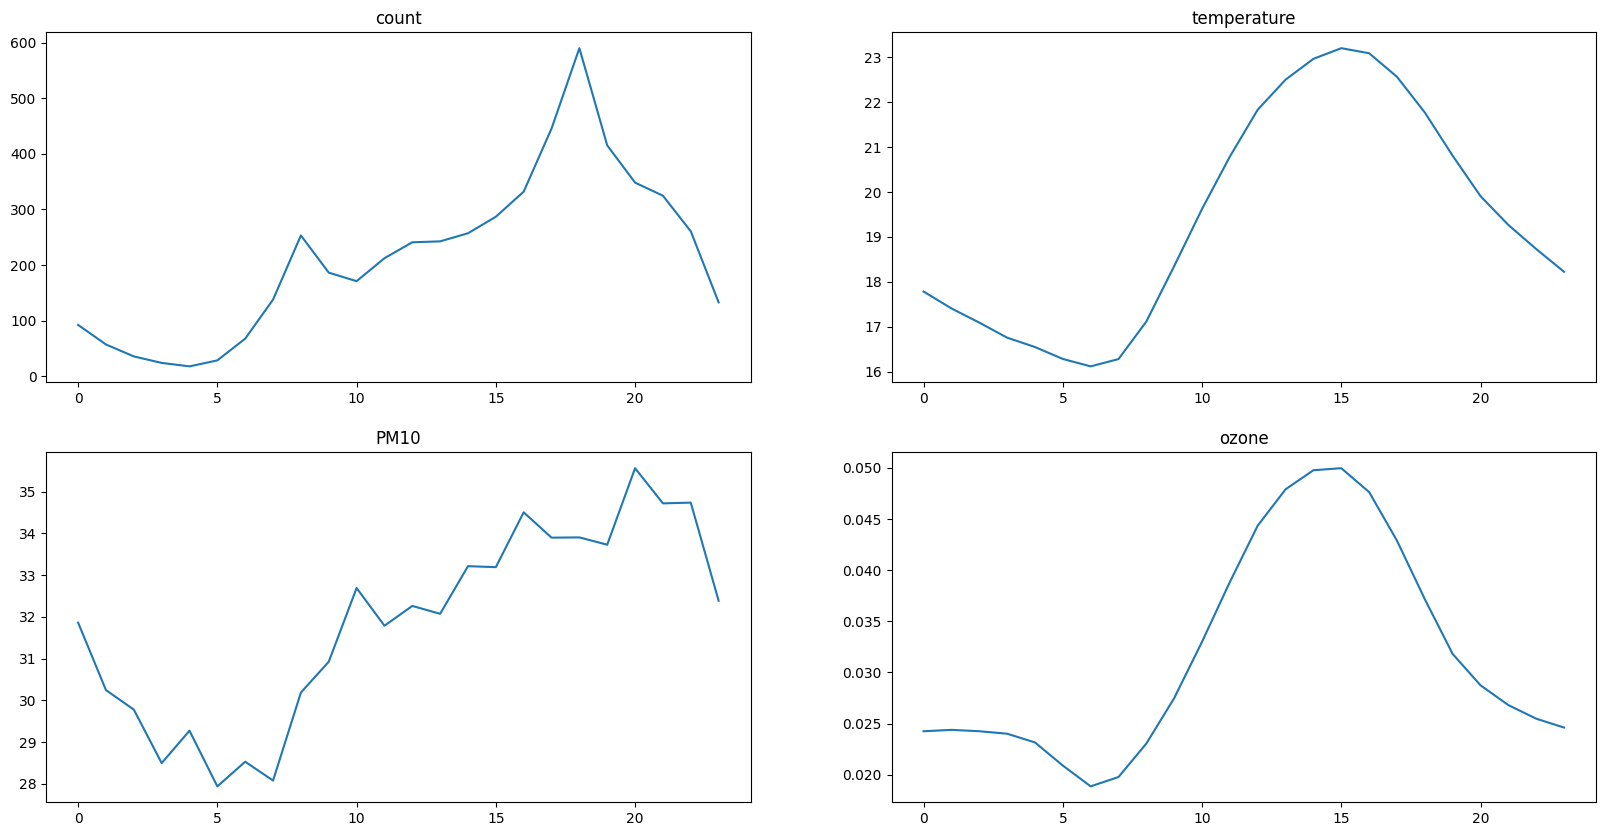

In [296]:
plt.figure(figsize=(20, 10))

plt.subplot(2, 2, 1)
plt.plot(hourmean['count'])
plt.title('count')

plt.subplot(2, 2, 2)
plt.plot(hourmean['temperature'])
plt.title('temperature')

plt.subplot(2, 2, 3)
plt.plot(hourmean['PM10'])
plt.title('PM10')

plt.subplot(2, 2, 4)
plt.plot(hourmean['ozone'])
plt.title('ozone')

plt.show()

Text(0.5, 1.0, 'mean usage in time(24)')

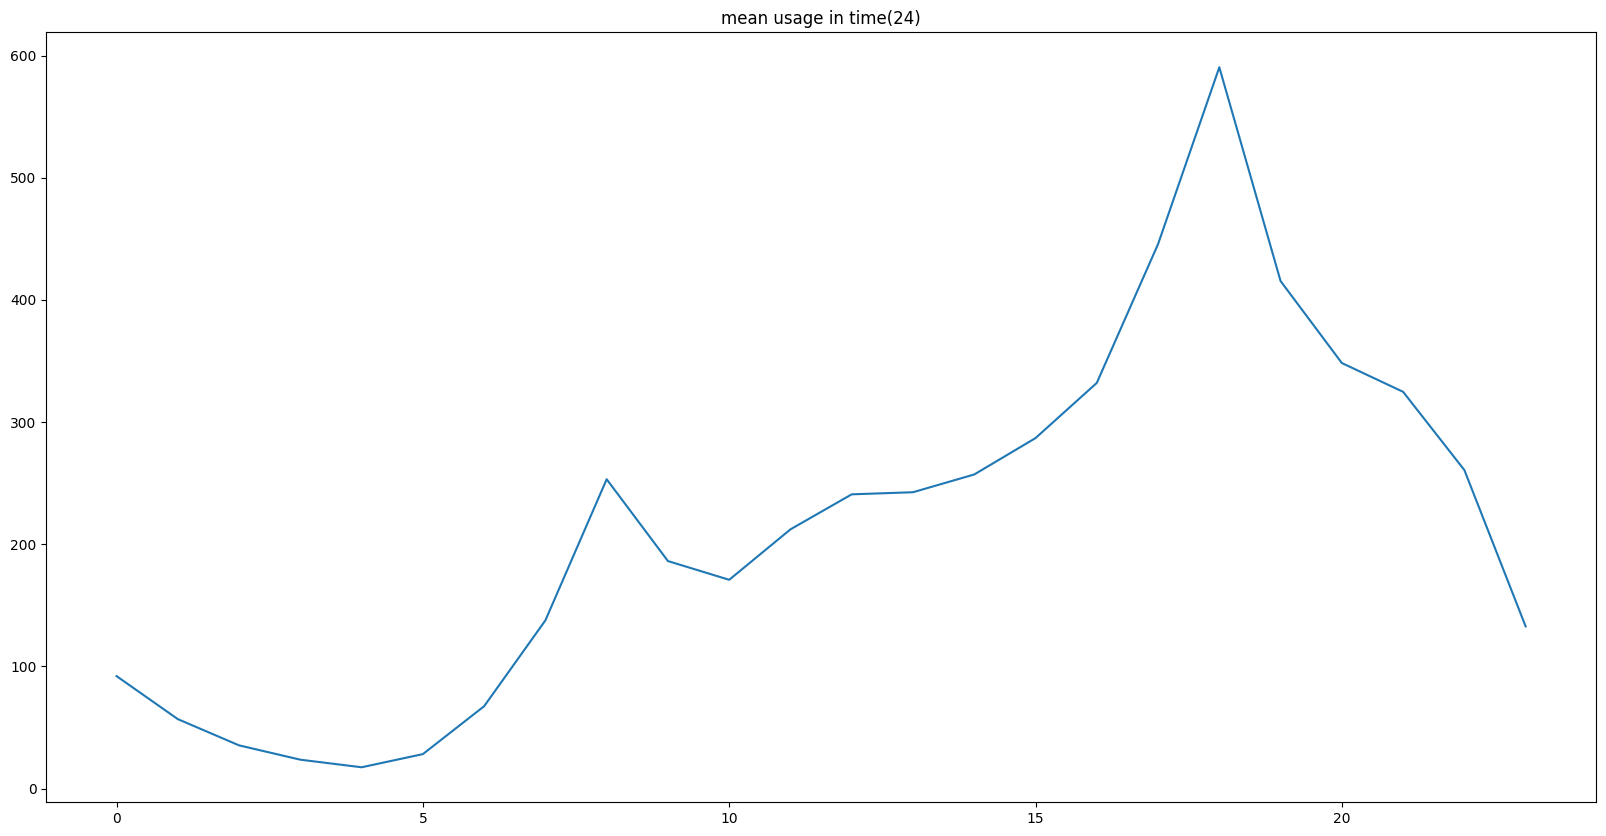

In [315]:
plt.figure(figsize=(20, 10))

plt.plot(hourmean['count'])
plt.title('mean usage in time(24)')

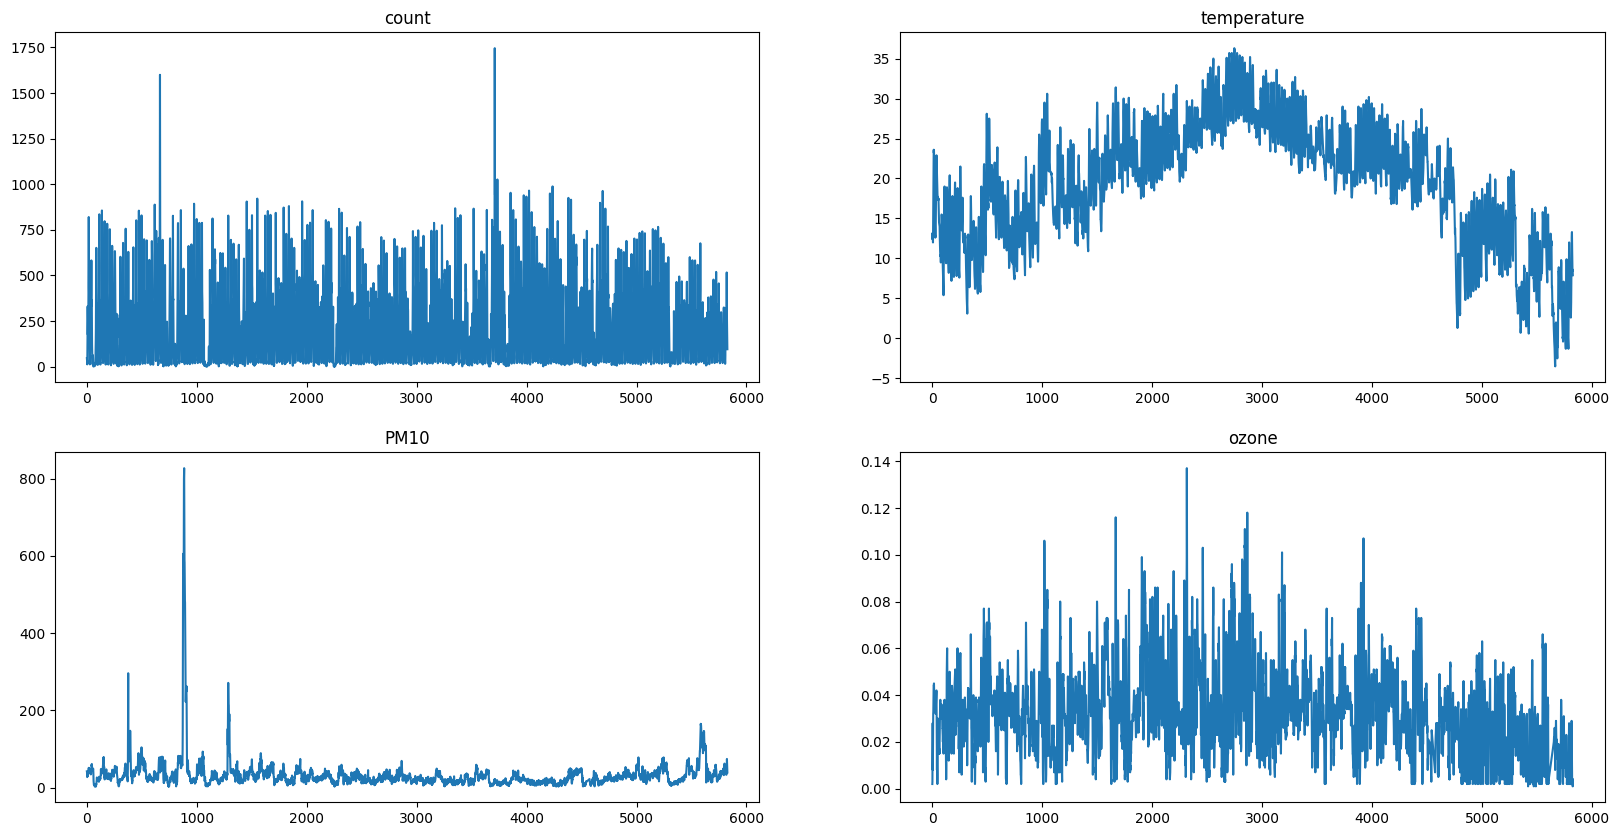

In [297]:
plt.figure(figsize=(20, 10))

plt.subplot(2, 2, 1)
plt.plot(cycle['count'])
plt.title('count')

plt.subplot(2, 2, 2)
plt.plot(cycle['temperature'])
plt.title('temperature')

plt.subplot(2, 2, 3)
plt.plot(cycle['PM10'])
plt.title('PM10')

plt.subplot(2, 2, 4)
plt.plot(cycle['ozone'])
plt.title('ozone')

plt.show()

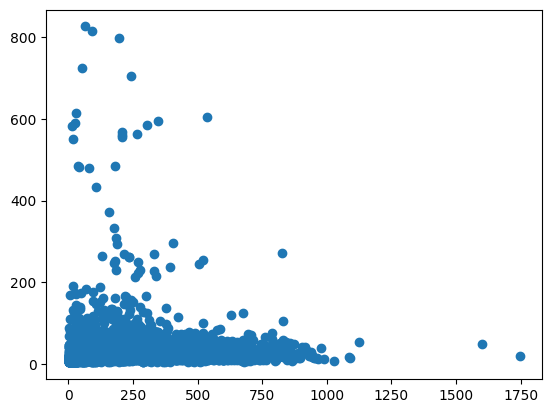

In [299]:
plt.scatter(cycle['count'], cycle['PM10'])

3. 온도 데이터와 따릉이 대여량간 분석

In [172]:
#데이터 타입에 주의하여 이변량 분석을 해보세요

4. 풍속 데이터와 따릉이 대여량간 분석

In [173]:
#데이터 타입에 주의하여 이변량 분석을 해보세요

5. 습도 데이터와 따릉이 대여량간 분석

In [174]:
#데이터 타입에 주의하여 이변량 분석을 해보세요

6. 시정 데이터와 따릉이 대여량간 분석

In [175]:
#데이터 타입에 주의하여 이변량 분석을 해보세요

7. 오존 데이터와 따릉이 대여량간 분석

In [176]:
#데이터 타입에 주의하여 이변량 분석을 해보세요

8. 미세먼지 농도 데이터와 따릉이 대여량간 분석

In [177]:
#데이터 타입에 주의하여 이변량 분석을 해보세요

9. 초미세먼지 농도 데이터와 따릉이 대여량간 분석

In [178]:
#데이터 타입에 주의하여 이변량 분석을 해보세요
spst.pearsonr

### [Step5] 가설 검정

#### <font color='green'>1. 강한 관계의 변수 (대립가설 채택)</font>

#### <font color='green'>2. 약한 관계의 변수</font>


#### <font color='green'>3. 관계 없는 변수 (귀무가설 채택)</font>


### [Step6] Insight 도출

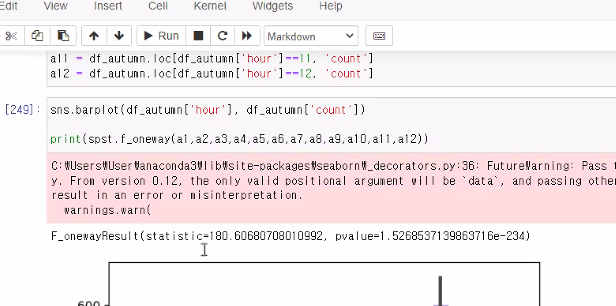

In [301]:
import folium as g

b_map = g.Map(location=[37.56,126.97],
             titles = 'Seoul',
             zoom_start=12)

for i in range(len(qwe)):
    latitude = qwe.iloc[i]['위도']
    longitude = qwe.iloc[i]['경도']
    location=(latitude, longitude)
    g.CircleMarker(location, radius=1,color='#3186cc',fill_color='#3186cc').add_to(b_map)
    
b_map

ModuleNotFoundError: No module named 'folium'

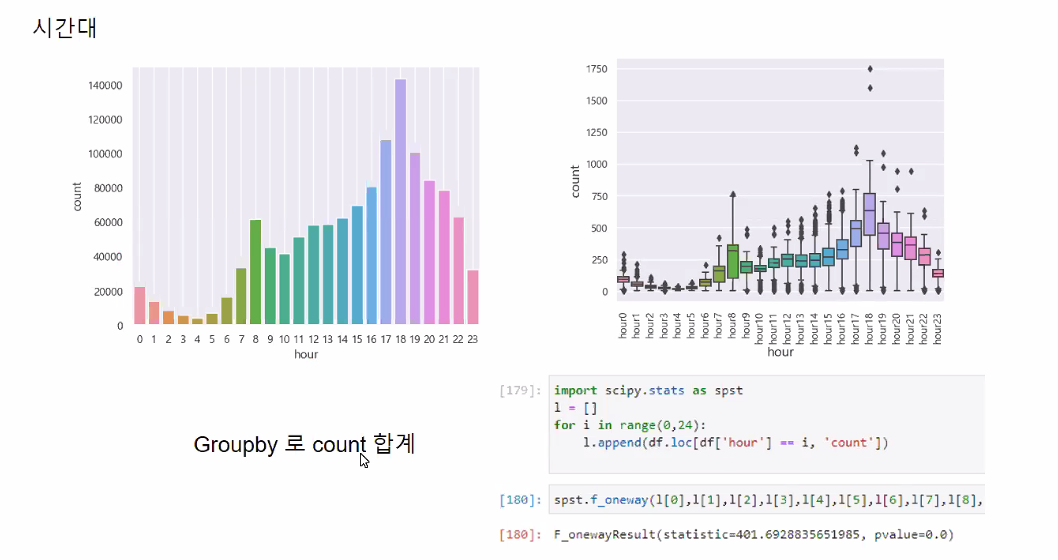

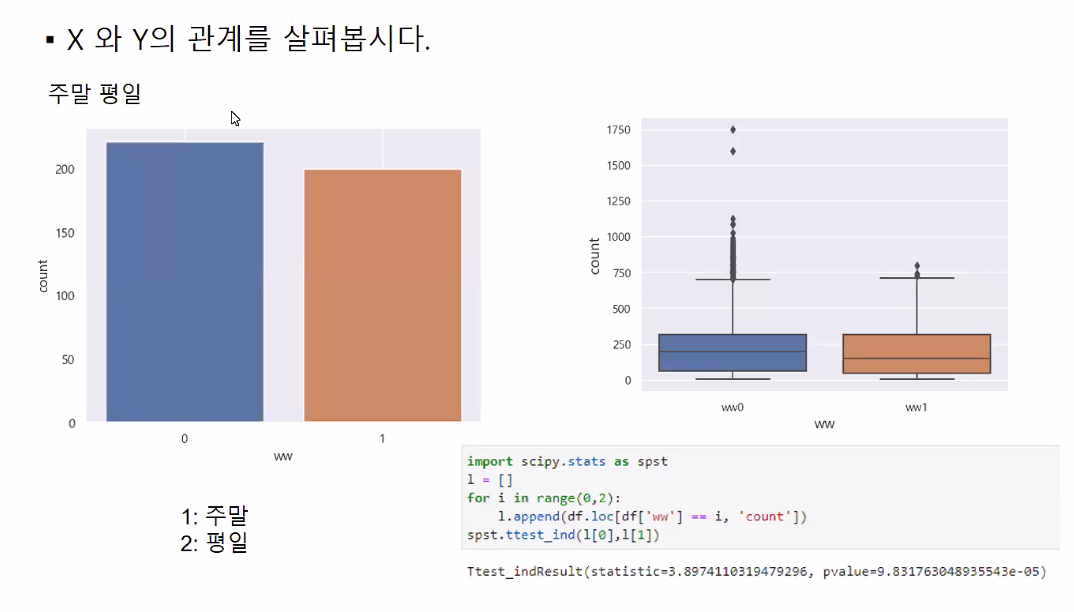

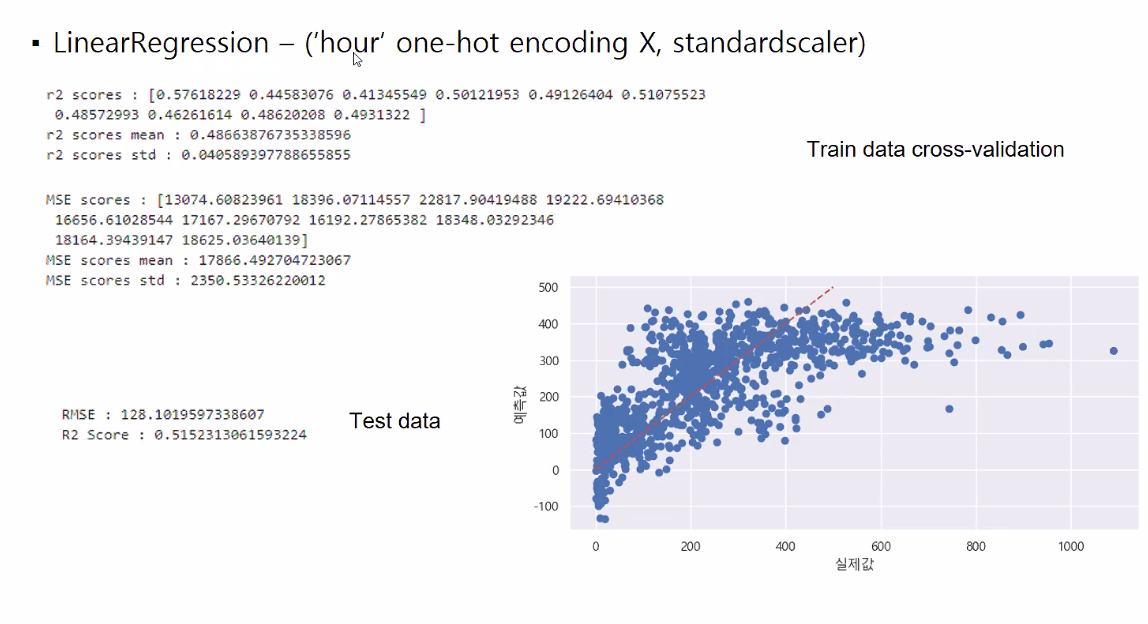

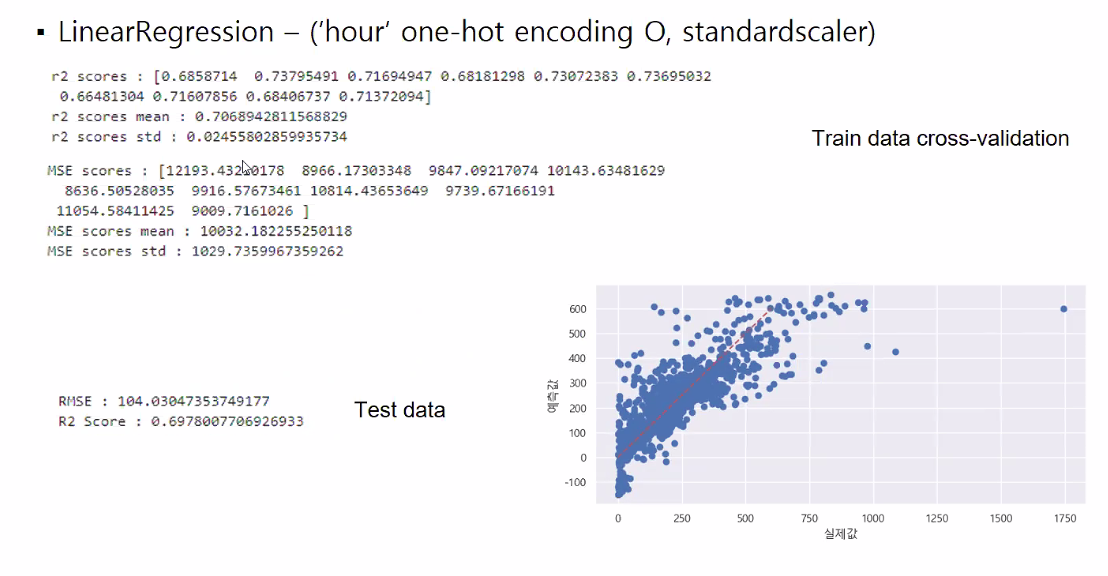

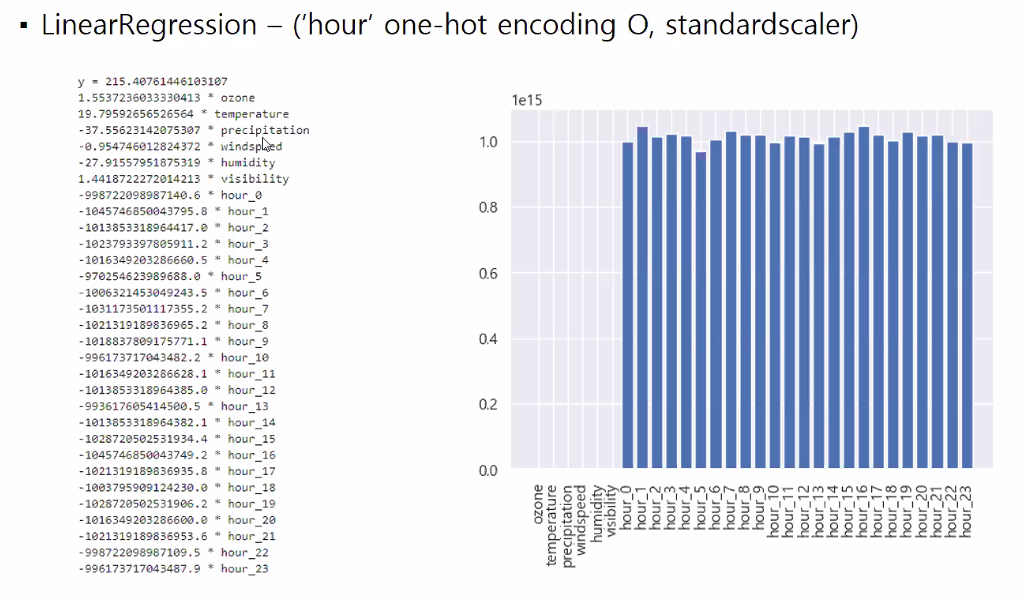

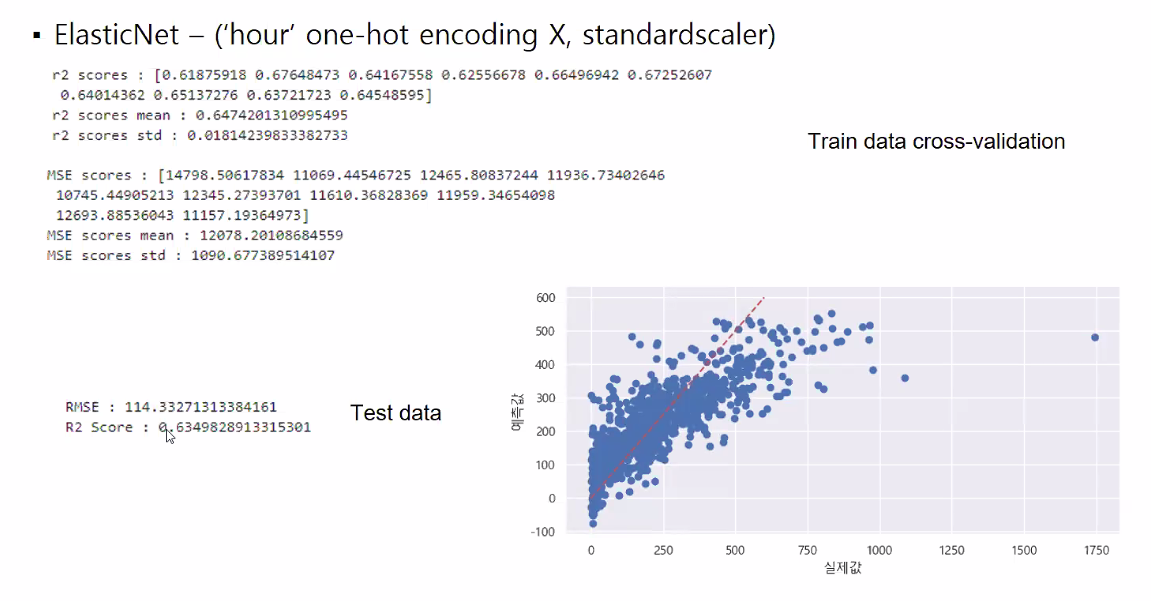